# To analyasis the time to travel to seattle could affect the price. Therefore, split the price in listings.csv into two kind of price, which are price_holiday and price_nonholiday

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [121]:
calendar_pd = pd.read_csv('..\dataset_origin\\calendar.csv')
calendar_pd.shape

(1048575, 4)

In [122]:
# Function to show the columns with missing values in descending order.
def show_missing_values(df):
    missing_vals = pd.DataFrame()
    filtered_predicator = []
    missing_vals['amount'] = df.isnull().sum().sort_values(ascending = False)
    missing_vals['ratio'] = round(missing_vals['amount']/len(df),2)
    return missing_vals[missing_vals['amount']>0].dropna()

In [123]:
show_missing_values(calendar_pd)

,amount,ratio
price,348713,0.33


#  price are empty are assumed that they do not have, so drop those rows

In [124]:
# calendar_pd.at[calendar_pd['price'].isnull(), 'price'] = 0

In [125]:
calendar_pd = calendar_pd.dropna()

In [126]:
show_missing_values(calendar_pd)

,amount,ratio


In [127]:
calendar_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699862 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  699862 non-null  int64 
 1   date        699862 non-null  object
 2   available   699862 non-null  object
 3   price       699862 non-null  object
dtypes: int64(1), object(3)
memory usage: 26.7+ MB


# Convert date to datetime and classfify into different months
# Convert price to float

In [128]:
# basic conversions
calendar_pd['date'] = pd.to_datetime(calendar_pd['date'])
calendar_pd['price'] = calendar_pd['price'].str.replace("[$, ]", "").astype("float")
calendar_pd['month'] = calendar_pd["date"].dt.month

# Show the average rent among different months

In [129]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
        ha='center', va='bottom')


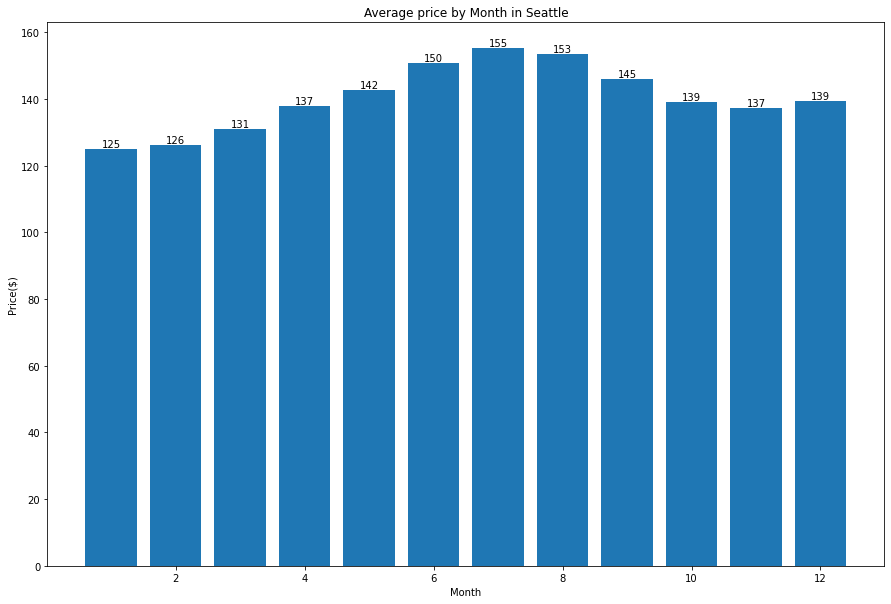

In [130]:
# average rent by month
plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).mean()
plt.figure(figsize=(15, 10))
ax = plt.subplot(1,1,1)
ax.set_title("Average price by Month in Seattle")
plt.xlabel("Month")
plt.ylabel("Price($)")
plt_average = plt.bar(plotdata2.index, plotdata2['price'])
autolabel(plt_average)


In [131]:
# plt.figure(figsize=(15, 10))
# # revenue by month
# plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).sum()
# # plotdata2.rename(columns={'price':'revenue'}, inplace=True)

# ax = plt.subplot(1,1,1)
# ax.set_title("Total avenue per month")
# splot = plt.bar(plotdata2.index, plotdata2['price'])

# After observing the plot of average price by month, we know that June - Angust have the highest average rent among a year, with the rent peaking in July.  
## After google it, we find this time in Seattle has beautiful sunshine, wildflower and very little rain, so host will normally raise up their rent.
## Therefore, we split our response into two-seaon' rent, we will notice the improvement of preidcting accuracy in later demo. 

In [132]:
calendar_pd

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1
...,...,...,...,...,...
1048570,5386937,2016-10-20,t,120.0,10
1048571,5386937,2016-10-21,t,120.0,10
1048572,5386937,2016-10-22,t,120.0,10
1048573,5386937,2016-10-23,t,120.0,10


# To split the calender dataframe into two dataframes by checking the month whether is in holiday season[6,7,8]

In [133]:
# Use Series built-in function: isin() and ~isin()
holiday_season = [6,7,8]
df_holiday = calendar_pd[calendar_pd['month'].isin(holiday_season)]
df_nonholiday = calendar_pd[~calendar_pd['month'].isin(holiday_season)]

# Merge the rows, which have the same listing_id and use the median value as the price

In [134]:
df_holiday = df_holiday[['price']].groupby(calendar_pd["listing_id"]).median().reset_index()
df_nonholiday = df_nonholiday[['price']].groupby(calendar_pd["listing_id"]).median().reset_index()

In [135]:
df_holiday

,listing_id,price
0,3335,120.0
1,5682,60.0
2,6606,90.0
3,9531,185.0
4,9534,125.0
...,...,...
2172,10309898,250.0
2173,10310373,20.0
2174,10331249,45.0
2175,10339145,299.0


In [136]:
df_nonholiday

,listing_id,price
0,3335,120.0
1,5682,50.0
2,6606,90.0
3,7369,85.0
4,9460,109.0
...,...,...
2790,10309898,250.0
2791,10310373,20.0
2792,10331249,45.0
2793,10339145,219.0


## Verify the difference between the two seasons. 

In [137]:
df_nonholiday.loc[df_nonholiday['listing_id'] == 6475289]

,listing_id,price
1513,6475289,139.0


In [138]:
df_holiday.loc[df_holiday['listing_id'] == 6475289]

,listing_id,price
1277,6475289,179.0


In [139]:
listing_df = pd.read_csv("..\dataset_filter\listings_holiday_nScore2.csv")

In [140]:
listing_df.rename(columns={'id':'listing_id'}, inplace=True)


In [141]:
df_holiday.rename(columns={'price':'price_hoiday'}, inplace=True)
df_nonholiday.rename(columns={'price':'price_nonhoiday'}, inplace=True)

In [142]:
df_nonholiday

,listing_id,price_nonhoiday
0,3335,120.0
1,5682,50.0
2,6606,90.0
3,7369,85.0
4,9460,109.0
...,...,...
2790,10309898,250.0
2791,10310373,20.0
2792,10331249,45.0
2793,10339145,219.0


In [143]:
merged_holiday = pd.merge(listing_df, df_holiday, on = 'listing_id', how='left')

In [144]:
merged_nonholiday = pd.merge(listing_df, df_nonholiday, on = 'listing_id', how='left')

# Verify the price changes in listings_holiday.csv and listings_nonholiday.csv

In [145]:
merged_holiday['price'] = merged_holiday['price'].replace('[\$,]', '', regex=True).astype(float)
merged_nonholiday['price'] = merged_nonholiday['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill the na in price_holiday and price_nonholiday with the value in price

In [146]:
merged_holiday['price_hoiday'].isnull().sum()

1641

In [147]:
merged_holiday['price_hoiday'] = merged_holiday['price_hoiday'].fillna(merged_holiday['price'])
merged_nonholiday['price_nonhoiday'] = merged_nonholiday['price_nonhoiday'].fillna(merged_nonholiday['price'])

In [148]:
merged_holiday['price_hoiday'].describe()

count    3818.000000
mean      140.781168
std       107.288012
min        20.000000
25%        75.000000
50%       106.000000
75%       169.000000
max      1199.000000
Name: price_hoiday, dtype: float64

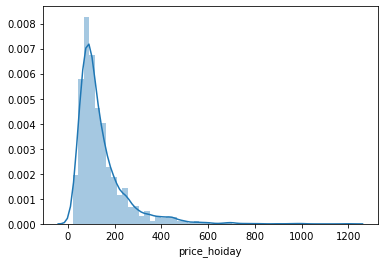

In [149]:
sb.distplot(merged_holiday['price_hoiday'])

In [150]:
merged_nonholiday['price_nonhoiday'].describe()

count    3818.000000
mean      131.278811
std        96.282760
min        20.000000
25%        75.000000
50%       104.000000
75%       150.000000
max      1650.000000
Name: price_nonhoiday, dtype: float64

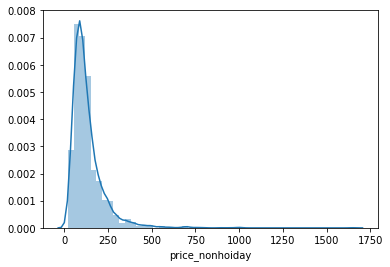

In [151]:
sb.distplot(merged_nonholiday['price_nonhoiday'])

In [152]:
merged_holiday['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

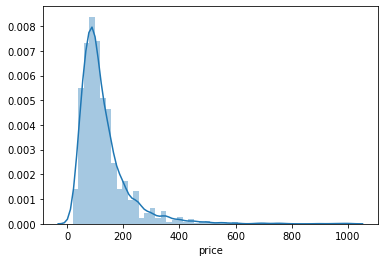

In [153]:
sb.distplot(merged_holiday['price'])

# Export to two listings to replace the old listings.csv

In [154]:
# merged_holiday.drop(columns=['price'], inplace=True)
# merged_nonholiday.drop(columns=['price'], inplace=True)
# merged_holiday.to_csv('../dataset_filter/listings_holiday.csv',index=False)
# merged_nonholiday.to_csv('../dataset_filter/listings_nonholiday.csv',index=False)

# holiday dataset split

In [155]:
merged_holiday['extra_people']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
3813    30.0
3814    50.0
3815    25.0
3816     0.0
3817    15.0
Name: extra_people, Length: 3818, dtype: float64

In [156]:
merged_holiday['extra_people'] = merged_holiday['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [157]:
#Check for columns infomation
merged_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Columns: 110 entries, Rank# to price_hoiday
dtypes: float64(61), object(49)
memory usage: 3.2+ MB


Number of neighbourhood : 81
Capitol Hill          767
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
Roxhill                 1
Fairmount Park          1
North College Park      1
Name: neighbourhood, Length: 81, dtype: int64


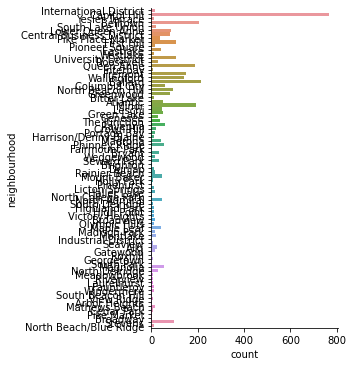

In [158]:
#print the unique values for neighborhood
print("Number of neighbourhood :", len(merged_holiday["neighbourhood"].unique()))

# neighborhood plot
print(merged_holiday["neighbourhood"].value_counts())
sb.catplot(y = "neighbourhood", data = merged_holiday, kind = "count")

Number of neighbourhood_cleansed : 87
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64


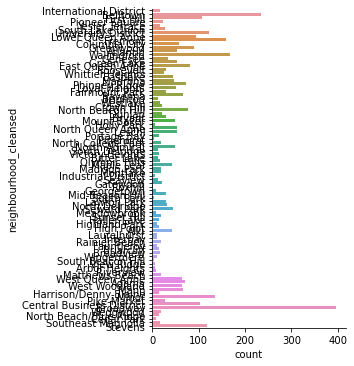

In [159]:
#print the unique values for neighbourhood_cleansed
print("Number of neighbourhood_cleansed :", len(merged_holiday["neighbourhood_cleansed"].unique()))

# neighbourhood_cleansed plot
print(merged_holiday["neighbourhood_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_cleansed", data = merged_holiday, kind = "count")

Number of neighbourhood_group_cleansed : 17
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64


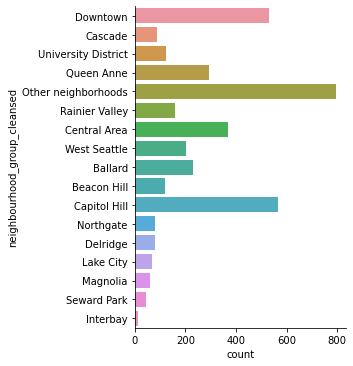

In [160]:
#print the unique values for neighbourhood_group_cleansed
print("Number of neighbourhood_group_cleansed :", len(merged_holiday["neighbourhood_group_cleansed"].unique()))

# neighbourhood_group_cleansed plot
print(merged_holiday["neighbourhood_group_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_group_cleansed", data = merged_holiday, kind = "count")

Number of host_neighbourhood : 102
Capitol Hill        705
Belltown            254
Ballard             210
Minor               191
Queen Anne          189
                   ... 
Downtown Toronto      1
Roxhill               1
Kauaʻi                1
Huntington Beach      1
Manhattan Beach       1
Name: host_neighbourhood, Length: 102, dtype: int64


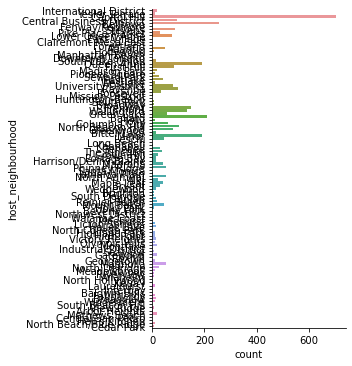

In [161]:

#print the unique values for host_neighbourhood
print("Number of host_neighbourhood :", len(merged_holiday["host_neighbourhood"].unique()))

# host_neighbourhood plot
print(merged_holiday["host_neighbourhood"].value_counts())
sb.catplot(y = "host_neighbourhood", data = merged_holiday, kind = "count")

Number of zipcode : 28
98122        427
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64


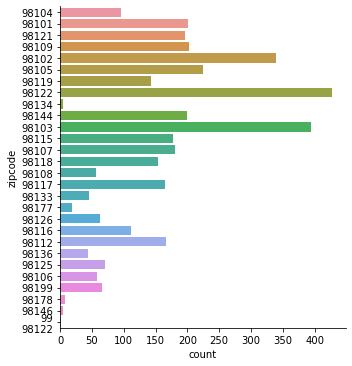

In [162]:
#print the unique values for zipcode
print("Number of zipcode :", len(merged_holiday["zipcode"].unique()))

# zipcode plot
print(merged_holiday["zipcode"].value_counts())
sb.catplot(y = "zipcode", data = merged_holiday, kind = "count")

In [163]:
#In the previous data cleasing part, we have already found that neighbourhood_group_cleansed and neighbourhood_cleansed have no missing value.
#By plotting the unique categories, we find that neighbourhood_group_cleansed has fewer categories. 
#Therefore, we choose this as criteria for zoning.

In [164]:
#merged_holiday.loc[merged_holiday.neighbourhood_group_cleansed=='5']
#merged_holiday.loc[merged_holiday.zipcode=='t']
#merged_holiday=merged_holiday.drop([1933,1942])
#merged_holiday


split based on mean of price

group data by their neighbourhood_group_cleansed attributes.

In [165]:
Capitol_Hill=[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        Capitol_Hill.append(row)
Capitol_Hill=pd.DataFrame(Capitol_Hill, columns=row._fields)
Capitol_Hill.price.describe()






count    567.000000
mean     130.592593
std       92.442331
min       22.000000
25%       80.000000
50%      105.000000
75%      150.000000
max      750.000000
Name: price, dtype: float64

In [166]:
Other_neighborhoods =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
Other_neighborhoods=pd.DataFrame(Other_neighborhoods, columns=row._fields)
Other_neighborhoods.price.describe()

count     794.000000
mean      119.968514
std        86.580450
min        25.000000
25%        66.000000
50%        99.000000
75%       145.000000
max      1000.000000
Name: price, dtype: float64

In [167]:
Interbay =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        Interbay.append(row)
Interbay=pd.DataFrame(Interbay, columns=row._fields)
Interbay.price.describe()

count     11.000000
mean     109.727273
std       60.003485
min       50.000000
25%       72.000000
50%       90.000000
75%      150.000000
max      250.000000
Name: price, dtype: float64

In [168]:
Seward_Park =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        Seward_Park.append(row)
Seward_Park=pd.DataFrame(Seward_Park, columns=row._fields)
Seward_Park.price.describe()


count     44.000000
mean     108.477273
std       71.718276
min       34.000000
25%       65.000000
50%       93.000000
75%      118.000000
max      375.000000
Name: price, dtype: float64

In [169]:
Magnolia =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        Magnolia.append(row)
Magnolia=pd.DataFrame(Magnolia, columns=row._fields)
Magnolia.price.describe()

count     61.000000
mean     177.672131
std      150.078726
min       30.000000
25%       78.000000
50%      129.000000
75%      225.000000
max      950.000000
Name: price, dtype: float64

In [170]:
Lake_City =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        Lake_City.append(row)
Lake_City=pd.DataFrame(Lake_City, columns=row._fields)
Lake_City.price.describe()

count     67.000000
mean      92.671642
std       57.212625
min       35.000000
25%       55.000000
50%       70.000000
75%      108.000000
max      252.000000
Name: price, dtype: float64

In [171]:
Delridge =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        Delridge.append(row)
Delridge=pd.DataFrame(Delridge, columns=row._fields)
Delridge.price.describe()

count     79.000000
mean      83.278481
std       41.797110
min       35.000000
25%       55.000000
50%       72.000000
75%       98.000000
max      300.000000
Name: price, dtype: float64

In [172]:
Northgate =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        Northgate.append(row)
Northgate=pd.DataFrame(Northgate, columns=row._fields)
Northgate.price.describe()


count     80.00000
mean      88.55000
std       38.64211
min       30.00000
25%       59.00000
50%       79.50000
75%      108.25000
max      200.00000
Name: price, dtype: float64

In [173]:
Cascade =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        Cascade.append(row)
Cascade=pd.DataFrame(Cascade, columns=row._fields)
Cascade.price.describe()


count     89.000000
mean     140.101124
std      112.179042
min       42.000000
25%       88.000000
50%      115.000000
75%      141.000000
max      775.000000
Name: price, dtype: float64

In [174]:
Beacon_Hill =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        Beacon_Hill.append(row)
Beacon_Hill=pd.DataFrame(Beacon_Hill, columns=row._fields)
Beacon_Hill.price.describe()

count    118.000000
mean      94.669492
std       61.528682
min       30.000000
25%       60.000000
50%       75.000000
75%      107.250000
max      399.000000
Name: price, dtype: float64

In [175]:
University_District =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        University_District.append(row)
University_District=pd.DataFrame(University_District, columns=row._fields)
University_District.price.describe()

count    122.000000
mean      93.639344
std       59.721816
min       28.000000
25%       53.500000
50%       85.000000
75%      105.000000
max      350.000000
Name: price, dtype: float64

In [176]:
Rainier_Valley =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        Rainier_Valley.append(row)
Rainier_Valley=pd.DataFrame(Rainier_Valley, columns=row._fields)
Rainier_Valley.price.describe()


count    159.000000
mean      91.899371
std       52.505599
min       25.000000
25%       58.500000
50%       80.000000
75%      105.000000
max      300.000000
Name: price, dtype: float64

In [177]:
West_Seattle =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        West_Seattle.append(row)
West_Seattle=pd.DataFrame(West_Seattle, columns=row._fields)
West_Seattle.price.describe()


count    203.000000
mean     141.359606
std       89.147801
min       30.000000
25%       79.000000
50%      109.000000
75%      195.000000
max      495.000000
Name: price, dtype: float64

In [178]:
Ballard =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        Ballard.append(row)
Ballard=pd.DataFrame(Ballard, columns=row._fields)
Ballard.price.describe()


count    230.000000
mean     124.682609
std       87.925033
min       25.000000
25%       70.000000
50%       95.000000
75%      149.000000
max      475.000000
Name: price, dtype: float64

In [179]:
Downtown=[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        Downtown.append(row)
Downtown=pd.DataFrame(Downtown, columns=row._fields)
Downtown.price.describe()




count    530.00000
mean     154.40566
std       90.90280
min       35.00000
25%      105.00000
50%      139.00000
75%      175.00000
max      999.00000
Name: price, dtype: float64

In [180]:
Central_Area =[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area':
        Central_Area.append(row)
Central_Area=pd.DataFrame(Central_Area, columns=row._fields)
Central_Area.price.describe()



count    369.000000
mean     128.338753
std       80.260558
min       35.000000
25%       75.000000
50%      100.000000
75%      155.000000
max      500.000000
Name: price, dtype: float64

In [181]:
Queen_Anne=[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        Queen_Anne.append(row)
Queen_Anne=pd.DataFrame(Queen_Anne, columns=row._fields)
Queen_Anne.price.describe()

count    295.000000
mean     157.223729
std      115.863385
min       20.000000
25%       95.000000
50%      119.000000
75%      175.000000
max      975.000000
Name: price, dtype: float64

create an array of dataframes


In [182]:
cities=[Other_neighborhoods,Capitol_Hill,Downtown,Central_Area,Queen_Anne,Ballard,West_Seattle,Rainier_Valley,University_District,Beacon_Hill,Cascade,Northgate,Delridge,Lake_City,Magnolia, Seward_Park, Interbay]

 We can divide cities based on the mean value  
mean of price >150-----Tier_1
100<mean of price <150-----Tier_2
mean of price <100-----Tier_3

In [183]:
#Create 3 empty dataframes
Tier_1=pd.DataFrame(columns=row._fields)
Tier_2=pd.DataFrame(columns=row._fields)
Tier_3=pd.DataFrame(columns=row._fields)
#group different cities according to the mean value of price.
for i in cities:
    #print(i)
    if(i.price.mean()>150):
        Tier_1=Tier_1.append(i)
    if(i.price.mean()<150 and i.price.mean()>100):
        Tier_2= Tier_2.append(i)
    if(i.price.mean()<100):
        Tier_3=Tier_3.append(i)
# For checking

Tier_1.price.describe()
Tier_2.price.describe()
Tier_3.price.describe()

count    625.000000
mean      91.326400
std       53.532751
min       25.000000
25%       58.000000
50%       79.000000
75%      105.000000
max      399.000000
Name: price, dtype: float64

In [184]:
#produce new csv files.
#Tier_1.to_csv('..\dataset_filter\Tier_1_holiday.csv',index=False)
#Tier_2.to_csv('..\dataset_filter\Tier_2_holiday.csv',index=False)
#Tier_3.to_csv('..\dataset_filter\Tier_3_holiday.csv',index=False)

# split based on districs

In [185]:
# We found that there are 7 districts in Seattle, so we put different neighbourhoods into different districts.
District_1=[]
District_2=[]
District_3=[]
District_4=[]
District_5=[]
District_6=[]
District_7=[]
Other_neighborhoods=[]
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        District_1.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        District_3.append(row)

for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        District_7.append(row)       
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area' :
        District_3.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        District_7.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        District_6.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        District_1.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        District_2.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        District_4.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        District_2.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        District_7.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        District_5.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        District_5.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        District_7.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        District_2.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        District_7.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='North Beacon Hill':
        District_3.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='S Morgan St, Seattle, WA 98108, United States':
        Other_neighborhoods.append(row)
for row in  merged_holiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
#convert tuples to corresponding dataframes.       

District_1 = pd.DataFrame(District_1, columns=row._fields)
District_2 = pd.DataFrame(District_2, columns=row._fields)
District_3 = pd.DataFrame(District_3, columns=row._fields)
District_4 = pd.DataFrame(District_4, columns=row._fields)
District_5 = pd.DataFrame(District_5, columns=row._fields)
District_6 = pd.DataFrame(District_6, columns=row._fields)
District_7 = pd.DataFrame(District_7, columns=row._fields)
Other_neighborhoods = pd.DataFrame(Other_neighborhoods, columns=row._fields)

print(type(District_1))
print(District_1.shape)
District_1.head()

print(type(District_2))
print(District_2.shape)
District_2.head()

print(type(District_3))
print(District_3.shape)
District_3.head()

print(type(District_4))
print(District_4.shape)
District_4.head()

print(type(District_5))
print(District_5.shape)
District_5.head()

print(type(District_6))
print(District_6.shape)
District_6.head()

print(type(District_7))
print(District_7.shape)
District_7.head()

print(type(Other_neighborhoods))
print(Other_neighborhoods.shape)
Other_neighborhoods.head()


<class 'pandas.core.frame.DataFrame'>
(282, 111)
<class 'pandas.core.frame.DataFrame'>
(321, 111)
<class 'pandas.core.frame.DataFrame'>
(936, 111)
<class 'pandas.core.frame.DataFrame'>
(122, 111)
<class 'pandas.core.frame.DataFrame'>
(147, 111)
<class 'pandas.core.frame.DataFrame'>
(230, 111)
<class 'pandas.core.frame.DataFrame'>
(986, 111)
<class 'pandas.core.frame.DataFrame'>
(794, 111)


,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_101,_102,Pool,_104,_105,_106,_107,TV,_109,price_hoiday
0,642,11.0,Fremont,90.0,64.0,79.0,"11,994",7662775.0,https://www.airbnb.com/rooms/7662775,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,200.0
1,643,11.0,Fremont,90.0,64.0,79.0,"11,994",490076.0,https://www.airbnb.com/rooms/490076,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,84.0
2,644,11.0,Fremont,90.0,64.0,79.0,"11,994",9217030.0,https://www.airbnb.com/rooms/9217030,4/1/2016,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,150.0
3,645,11.0,Fremont,90.0,64.0,79.0,"11,994",7756839.0,https://www.airbnb.com/rooms/7756839,4/1/2016,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,82.0
4,646,11.0,Fremont,90.0,64.0,79.0,"11,994",116221.0,https://www.airbnb.com/rooms/116221,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,140.0


In [186]:
# We find that houses in District1,District2,District4 and District5 are not so many, therefore, we cancatenate them into District_1245.
District_1245=pd.concat([District_1,District_2,District_4,District_5])

In [187]:
District_1245_new=District_1245.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_3_new=District_3.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_6_new=District_6.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_7_new=District_7.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
Other_neighborhoods_new=Other_neighborhoods.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")

In [188]:
#Chcek
District_1245_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,,,,,
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,,,,,
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,,,,,
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,,,,,
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3677,NaN,NaN,NaN,NaN,NaN,NaN,6438099.0,https://www.airbnb.com/rooms/6438099,4/1/2016,...,1.0,1.0,0.0,0.0,55.0,,,,,
143,3678,NaN,NaN,NaN,NaN,NaN,NaN,7650458.0,https://www.airbnb.com/rooms/7650458,4/1/2016,...,1.0,1.0,0.0,0.0,70.0,,,,,
144,3679,NaN,NaN,NaN,NaN,NaN,NaN,7219541.0,https://www.airbnb.com/rooms/7219541,4/1/2016,...,1.0,1.0,1.0,0.0,80.0,,,,,
145,3680,NaN,NaN,NaN,NaN,NaN,NaN,4092037.0,https://www.airbnb.com/rooms/4092037,4/1/2016,...,1.0,1.0,0.0,0.0,250.0,,,,,


In [189]:
District_1245_new['District_1245']=1
District_1245_new['District_3']=0
District_1245_new['District_6']=0
District_1245_new['District_7']=0
District_1245_new['Other_neighborhoods']=0
#Check
District_1245_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,1,0,0,0,0
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,1,0,0,0,0
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,1,0,0,0,0
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,1,0,0,0,0
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3677,NaN,NaN,NaN,NaN,NaN,NaN,6438099.0,https://www.airbnb.com/rooms/6438099,4/1/2016,...,1.0,1.0,0.0,0.0,55.0,1,0,0,0,0
143,3678,NaN,NaN,NaN,NaN,NaN,NaN,7650458.0,https://www.airbnb.com/rooms/7650458,4/1/2016,...,1.0,1.0,0.0,0.0,70.0,1,0,0,0,0
144,3679,NaN,NaN,NaN,NaN,NaN,NaN,7219541.0,https://www.airbnb.com/rooms/7219541,4/1/2016,...,1.0,1.0,1.0,0.0,80.0,1,0,0,0,0
145,3680,NaN,NaN,NaN,NaN,NaN,NaN,4092037.0,https://www.airbnb.com/rooms/4092037,4/1/2016,...,1.0,1.0,0.0,0.0,250.0,1,0,0,0,0


Change column values of DataFrame District_3_new

In [190]:
District_3_new['District_1245']=0
District_3_new['District_3']=1
District_3_new['District_6']=0
District_3_new['District_7']=0
District_3_new['Other_neighborhoods']=0
#Check
District_3_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2047,42.0,Portage Bay,72.0,76.0,79.0,"1,397",6214517.0,https://www.airbnb.com/rooms/6214517,4/1/2016,...,1.0,1.0,0.0,0.0,200.0,0,1,0,0,0
1,2048,42.0,Portage Bay,72.0,76.0,79.0,"1,397",8036620.0,https://www.airbnb.com/rooms/8036620,4/1/2016,...,1.0,1.0,0.0,0.0,525.0,0,1,0,0,0
2,2049,42.0,Portage Bay,72.0,76.0,79.0,"1,397",8152764.0,https://www.airbnb.com/rooms/8152764,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,0,1,0,0,0
3,2050,42.0,Portage Bay,72.0,76.0,79.0,"1,397",6837751.0,https://www.airbnb.com/rooms/6837751,4/1/2016,...,1.0,1.0,0.0,0.0,90.0,0,1,0,0,0
4,2051,42.0,Portage Bay,72.0,76.0,79.0,"1,397",2459519.0,https://www.airbnb.com/rooms/2459519,4/1/2016,...,1.0,1.0,0.0,0.0,750.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3109,NaN,NaN,NaN,NaN,NaN,NaN,4546924.0,https://www.airbnb.com/rooms/4546924,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,1,0,0,0
932,3110,NaN,NaN,NaN,NaN,NaN,NaN,2760901.0,https://www.airbnb.com/rooms/2760901,4/1/2016,...,1.0,1.0,0.0,0.0,119.0,0,1,0,0,0
933,3111,NaN,NaN,NaN,NaN,NaN,NaN,3490239.0,https://www.airbnb.com/rooms/3490239,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,1,0,0,0
934,3112,NaN,NaN,NaN,NaN,NaN,NaN,3416217.0,https://www.airbnb.com/rooms/3416217,4/1/2016,...,1.0,1.0,0.0,0.0,170.0,0,1,0,0,0


In [191]:
District_6_new['District_1245']=0
District_6_new['District_3']=0
District_6_new['District_6']=1
District_6_new['District_7']=0
District_6_new['Other_neighborhoods']=0
#Check
District_6_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,1367,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",3861673.0,https://www.airbnb.com/rooms/3861673,4/1/2016,...,1.0,1.0,0.0,0.0,71.0,0,0,1,0,0
1,1368,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",461234.0,https://www.airbnb.com/rooms/461234,4/1/2016,...,1.0,1.0,0.0,0.0,99.0,0,0,1,0,0
2,1369,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",3510818.0,https://www.airbnb.com/rooms/3510818,4/1/2016,...,1.0,1.0,1.0,0.0,140.0,0,0,1,0,0
3,1370,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",6245498.0,https://www.airbnb.com/rooms/6245498,4/1/2016,...,1.0,1.0,0.0,0.0,105.0,0,0,1,0,0
4,1371,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",6557018.0,https://www.airbnb.com/rooms/6557018,4/1/2016,...,1.0,0.0,0.0,0.0,115.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2893,NaN,NaN,NaN,NaN,NaN,NaN,9367465.0,https://www.airbnb.com/rooms/9367465,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,1,0,0
226,2894,NaN,NaN,NaN,NaN,NaN,NaN,3031415.0,https://www.airbnb.com/rooms/3031415,4/1/2016,...,1.0,1.0,0.0,0.0,275.0,0,0,1,0,0
227,2895,NaN,NaN,NaN,NaN,NaN,NaN,843812.0,https://www.airbnb.com/rooms/843812,4/1/2016,...,1.0,1.0,1.0,0.0,180.0,0,0,1,0,0
228,2896,NaN,NaN,NaN,NaN,NaN,NaN,3835995.0,https://www.airbnb.com/rooms/3835995,4/1/2016,...,1.0,1.0,0.0,0.0,97.0,0,0,1,0,0


In [192]:
District_7_new['District_1245']=0
District_7_new['District_3']=0
District_7_new['District_6']=0
District_7_new['District_7']=1
District_7_new['Other_neighborhoods']=0
#Check
District_7_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,0,2.0,International District,98.0,100.0,80.0,"3,396",365550.0,https://www.airbnb.com/rooms/365550,4/1/2016,...,1.0,1.0,0.0,0.0,114.0,0,0,0,1,0
1,1,2.0,International District,98.0,100.0,80.0,"3,396",7777381.0,https://www.airbnb.com/rooms/7777381,4/1/2016,...,1.0,1.0,0.0,0.0,80.0,0,0,0,1,0
2,2,2.0,International District,98.0,100.0,80.0,"3,396",1778989.0,https://www.airbnb.com/rooms/1778989,4/1/2016,...,1.0,1.0,1.0,0.0,120.0,0,0,0,1,0
3,3,2.0,International District,98.0,100.0,80.0,"3,396",5031285.0,https://www.airbnb.com/rooms/5031285,4/1/2016,...,1.0,0.0,0.0,0.0,40.0,0,0,0,1,0
4,4,2.0,International District,98.0,100.0,80.0,"3,396",5031383.0,https://www.airbnb.com/rooms/5031383,4/1/2016,...,1.0,1.0,0.0,1.0,40.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,2582,74.0,Interbay,50.0,50.0,76.0,"1,599",2134911.0,https://www.airbnb.com/rooms/2134911,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,1,0
982,2583,74.0,Interbay,50.0,50.0,76.0,"1,599",5002964.0,https://www.airbnb.com/rooms/5002964,4/1/2016,...,1.0,1.0,0.0,0.0,50.0,0,0,0,1,0
983,2584,74.0,Interbay,50.0,50.0,76.0,"1,599",6780615.0,https://www.airbnb.com/rooms/6780615,4/1/2016,...,1.0,1.0,0.0,0.0,214.0,0,0,0,1,0
984,2585,74.0,Interbay,50.0,50.0,76.0,"1,599",2586642.0,https://www.airbnb.com/rooms/2586642,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,0,0,1,0


In [193]:
Other_neighborhoods_new['District_1245']=0
Other_neighborhoods_new['District_3']=0
Other_neighborhoods_new['District_6']=0
Other_neighborhoods_new['District_7']=0
Other_neighborhoods_new['Other_neighborhoods']=1
#Check
Other_neighborhoods_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,642,11.0,Fremont,90.0,64.0,79.0,"11,994",7662775.0,https://www.airbnb.com/rooms/7662775,4/1/2016,...,1.0,1.0,1.0,0.0,200.0,0,0,0,0,1
1,643,11.0,Fremont,90.0,64.0,79.0,"11,994",490076.0,https://www.airbnb.com/rooms/490076,4/1/2016,...,1.0,1.0,1.0,0.0,84.0,0,0,0,0,1
2,644,11.0,Fremont,90.0,64.0,79.0,"11,994",9217030.0,https://www.airbnb.com/rooms/9217030,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
3,645,11.0,Fremont,90.0,64.0,79.0,"11,994",7756839.0,https://www.airbnb.com/rooms/7756839,4/1/2016,...,1.0,1.0,1.0,0.0,82.0,0,0,0,0,1
4,646,11.0,Fremont,90.0,64.0,79.0,"11,994",116221.0,https://www.airbnb.com/rooms/116221,4/1/2016,...,1.0,1.0,1.0,0.0,140.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3669,NaN,NaN,NaN,NaN,NaN,NaN,8780704.0,https://www.airbnb.com/rooms/8780704,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,0,1
790,3670,NaN,NaN,NaN,NaN,NaN,NaN,9714078.0,https://www.airbnb.com/rooms/9714078,4/1/2016,...,1.0,1.0,0.0,0.0,108.0,0,0,0,0,1
791,3671,NaN,NaN,NaN,NaN,NaN,NaN,1593991.0,https://www.airbnb.com/rooms/1593991,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
792,3672,NaN,NaN,NaN,NaN,NaN,NaN,6239108.0,https://www.airbnb.com/rooms/6239108,4/1/2016,...,1.0,1.0,0.0,0.0,75.0,0,0,0,0,1


In [194]:
new_listing=pd.concat([District_1245_new,District_3_new,District_6_new,District_7_new,Other_neighborhoods_new])
#check
new_listing

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_hoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,1,0,0,0,0
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,1,0,0,0,0
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,1,0,0,0,0
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,1,0,0,0,0
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3669,NaN,NaN,NaN,NaN,NaN,NaN,8780704.0,https://www.airbnb.com/rooms/8780704,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,0,1
790,3670,NaN,NaN,NaN,NaN,NaN,NaN,9714078.0,https://www.airbnb.com/rooms/9714078,4/1/2016,...,1.0,1.0,0.0,0.0,108.0,0,0,0,0,1
791,3671,NaN,NaN,NaN,NaN,NaN,NaN,1593991.0,https://www.airbnb.com/rooms/1593991,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
792,3672,NaN,NaN,NaN,NaN,NaN,NaN,6239108.0,https://www.airbnb.com/rooms/6239108,4/1/2016,...,1.0,1.0,0.0,0.0,75.0,0,0,0,0,1


In [195]:
#new_listing.to_csv('..\\dataset_filter\\new_listing_holiday.csv',index=False)

# non holiday dataset split

In [196]:
merged_nonholiday['extra_people']



0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
3813    30.0
3814    50.0
3815    25.0
3816     0.0
3817    15.0
Name: extra_people, Length: 3818, dtype: float64

In [197]:
#Check for columns infomation
merged_nonholiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Columns: 110 entries, Rank# to price_nonhoiday
dtypes: float64(61), object(49)
memory usage: 3.2+ MB


Number of neighbourhood : 81
Capitol Hill          767
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
Roxhill                 1
Fairmount Park          1
North College Park      1
Name: neighbourhood, Length: 81, dtype: int64


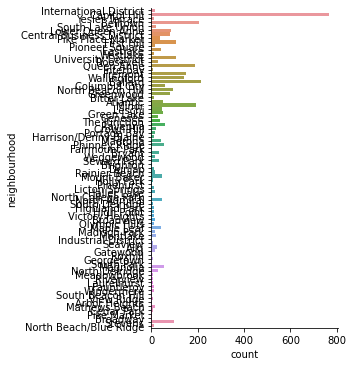

In [198]:
#print the unique values for neighborhood
print("Number of neighbourhood :", len(merged_nonholiday["neighbourhood"].unique()))

# neighborhood plot
print(merged_nonholiday["neighbourhood"].value_counts())
sb.catplot(y = "neighbourhood", data = merged_nonholiday, kind = "count")

Number of neighbourhood_cleansed : 87
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64


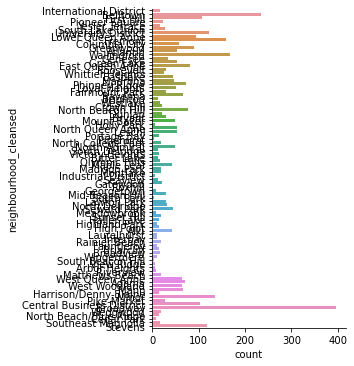

In [199]:
#print the unique values for neighbourhood_cleansed
print("Number of neighbourhood_cleansed :", len(merged_nonholiday["neighbourhood_cleansed"].unique()))

# neighbourhood_cleansed plot
print(merged_nonholiday["neighbourhood_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_cleansed", data = merged_nonholiday, kind = "count")

Number of neighbourhood_group_cleansed : 17
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64


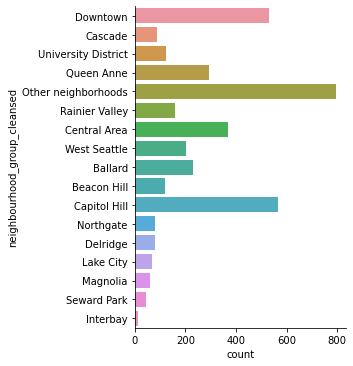

In [200]:
#print the unique values for neighbourhood_group_cleansed
print("Number of neighbourhood_group_cleansed :", len(merged_nonholiday["neighbourhood_group_cleansed"].unique()))

# neighbourhood_group_cleansed plot
print(merged_nonholiday["neighbourhood_group_cleansed"].value_counts())
sb.catplot(y = "neighbourhood_group_cleansed", data = merged_nonholiday, kind = "count")

Number of host_neighbourhood : 102
Capitol Hill        705
Belltown            254
Ballard             210
Minor               191
Queen Anne          189
                   ... 
Downtown Toronto      1
Roxhill               1
Kauaʻi                1
Huntington Beach      1
Manhattan Beach       1
Name: host_neighbourhood, Length: 102, dtype: int64


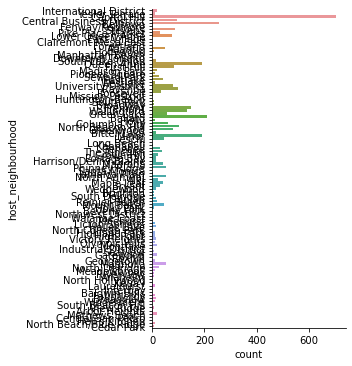

In [201]:

#print the unique values for host_neighbourhood
print("Number of host_neighbourhood :", len(merged_nonholiday["host_neighbourhood"].unique()))

# host_neighbourhood plot
print(merged_nonholiday["host_neighbourhood"].value_counts())
sb.catplot(y = "host_neighbourhood", data = merged_nonholiday, kind = "count")

Number of zipcode : 28
98122        427
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64


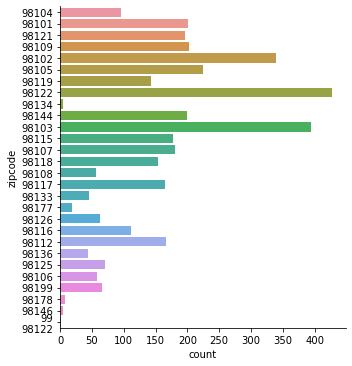

In [202]:

#print the unique values for zipcode
print("Number of zipcode :", len(merged_nonholiday["zipcode"].unique()))

# zipcode plot
print(merged_nonholiday["zipcode"].value_counts())
sb.catplot(y = "zipcode", data = merged_nonholiday, kind = "count")

In [203]:
#In the previous data cleasing part, we have already found that neighbourhood_group_cleansed and neighbourhood_cleansed have no missing value.

In [204]:
#By plotting the unique categories, we find that neighbourhood_group_cleansed has fewer categories. 
#Therefore, we choose this as criteria for zoning.

In [205]:
#merged_nonholiday.loc[merged_nonholiday.neighbourhood_group_cleansed=='5']


#listings.loc[listings.zipcode=='t']


#listing_new=listings.drop([1933,1942])
#listing_new





# group data by their neighbourhood_group_cleansed attributes.

In [206]:
Capitol_Hill=[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        Capitol_Hill.append(row)
Capitol_Hill=pd.DataFrame(Capitol_Hill, columns=row._fields)
Capitol_Hill.price.describe()


count    567.000000
mean     130.592593
std       92.442331
min       22.000000
25%       80.000000
50%      105.000000
75%      150.000000
max      750.000000
Name: price, dtype: float64

In [207]:
Other_neighborhoods =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
Other_neighborhoods=pd.DataFrame(Other_neighborhoods, columns=row._fields)
Other_neighborhoods.price.describe()

count     794.000000
mean      119.968514
std        86.580450
min        25.000000
25%        66.000000
50%        99.000000
75%       145.000000
max      1000.000000
Name: price, dtype: float64

In [208]:
Downtown=[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        Downtown.append(row)
Downtown=pd.DataFrame(Downtown, columns=row._fields)
Downtown.price.describe()

count    530.00000
mean     154.40566
std       90.90280
min       35.00000
25%      105.00000
50%      139.00000
75%      175.00000
max      999.00000
Name: price, dtype: float64

In [209]:
Central_Area =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area':
        Central_Area.append(row)
Central_Area=pd.DataFrame(Central_Area, columns=row._fields)
Central_Area.price.describe()

count    369.000000
mean     128.338753
std       80.260558
min       35.000000
25%       75.000000
50%      100.000000
75%      155.000000
max      500.000000
Name: price, dtype: float64

In [210]:
Queen_Anne=[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        Queen_Anne.append(row)
Queen_Anne=pd.DataFrame(Queen_Anne, columns=row._fields)
Queen_Anne.price.describe()

count    295.000000
mean     157.223729
std      115.863385
min       20.000000
25%       95.000000
50%      119.000000
75%      175.000000
max      975.000000
Name: price, dtype: float64

In [211]:
Ballard =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        Ballard.append(row)
Ballard=pd.DataFrame(Ballard, columns=row._fields)
Ballard.price.describe()

count    230.000000
mean     124.682609
std       87.925033
min       25.000000
25%       70.000000
50%       95.000000
75%      149.000000
max      475.000000
Name: price, dtype: float64

In [212]:
West_Seattle =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        West_Seattle.append(row)
West_Seattle=pd.DataFrame(West_Seattle, columns=row._fields)
West_Seattle.price.describe()

count    203.000000
mean     141.359606
std       89.147801
min       30.000000
25%       79.000000
50%      109.000000
75%      195.000000
max      495.000000
Name: price, dtype: float64

In [213]:
Rainier_Valley =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        Rainier_Valley.append(row)
Rainier_Valley=pd.DataFrame(Rainier_Valley, columns=row._fields)
Rainier_Valley.price.describe()

count    159.000000
mean      91.899371
std       52.505599
min       25.000000
25%       58.500000
50%       80.000000
75%      105.000000
max      300.000000
Name: price, dtype: float64

In [214]:
University_District =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        University_District.append(row)
University_District=pd.DataFrame(University_District, columns=row._fields)
University_District.price.describe()

count    122.000000
mean      93.639344
std       59.721816
min       28.000000
25%       53.500000
50%       85.000000
75%      105.000000
max      350.000000
Name: price, dtype: float64

In [215]:
Beacon_Hill =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        Beacon_Hill.append(row)
Beacon_Hill=pd.DataFrame(Beacon_Hill, columns=row._fields)
Beacon_Hill.price.describe()

count    118.000000
mean      94.669492
std       61.528682
min       30.000000
25%       60.000000
50%       75.000000
75%      107.250000
max      399.000000
Name: price, dtype: float64

In [216]:
Cascade =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        Cascade.append(row)
Cascade=pd.DataFrame(Cascade, columns=row._fields)
Cascade.price.describe()

count     89.000000
mean     140.101124
std      112.179042
min       42.000000
25%       88.000000
50%      115.000000
75%      141.000000
max      775.000000
Name: price, dtype: float64

In [217]:
Northgate =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        Northgate.append(row)
Northgate=pd.DataFrame(Northgate, columns=row._fields)
Northgate.price.describe()

count     80.00000
mean      88.55000
std       38.64211
min       30.00000
25%       59.00000
50%       79.50000
75%      108.25000
max      200.00000
Name: price, dtype: float64

In [218]:
Delridge =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        Delridge.append(row)
Delridge=pd.DataFrame(Delridge, columns=row._fields)
Delridge.price.describe()

count     79.000000
mean      83.278481
std       41.797110
min       35.000000
25%       55.000000
50%       72.000000
75%       98.000000
max      300.000000
Name: price, dtype: float64

In [219]:
Lake_City =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        Lake_City.append(row)
Lake_City=pd.DataFrame(Lake_City, columns=row._fields)
Lake_City.price.describe()

count     67.000000
mean      92.671642
std       57.212625
min       35.000000
25%       55.000000
50%       70.000000
75%      108.000000
max      252.000000
Name: price, dtype: float64

In [220]:
Magnolia =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        Magnolia.append(row)
Magnolia=pd.DataFrame(Magnolia, columns=row._fields)
Magnolia.price.describe()

count     61.000000
mean     177.672131
std      150.078726
min       30.000000
25%       78.000000
50%      129.000000
75%      225.000000
max      950.000000
Name: price, dtype: float64

In [221]:
Seward_Park =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        Seward_Park.append(row)
Seward_Park=pd.DataFrame(Seward_Park, columns=row._fields)
Seward_Park.price.describe()

count     44.000000
mean     108.477273
std       71.718276
min       34.000000
25%       65.000000
50%       93.000000
75%      118.000000
max      375.000000
Name: price, dtype: float64

In [222]:
Interbay =[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        Interbay.append(row)
Interbay=pd.DataFrame(Interbay, columns=row._fields)
Interbay.price.describe()

count     11.000000
mean     109.727273
std       60.003485
min       50.000000
25%       72.000000
50%       90.000000
75%      150.000000
max      250.000000
Name: price, dtype: float64

In [223]:
# create an array of dataframes
cities=[Other_neighborhoods,Capitol_Hill,Downtown,Central_Area,Queen_Anne,Ballard,West_Seattle,Rainier_Valley,University_District,Beacon_Hill,Cascade,Northgate,Delridge,Lake_City,Magnolia, Seward_Park, Interbay]

In [224]:
#The same as previous step

# We can divide cities based on the mean value  
#mean of price >150-----Tier_1
#100<mean of price <150-----Tier_2
#mean of price <100-----Tier_3

In [225]:
#Create 3 empty dataframes
Tier_1=pd.DataFrame(columns=row._fields)
Tier_2=pd.DataFrame(columns=row._fields)
Tier_3=pd.DataFrame(columns=row._fields)
#group different cities according to the mean value of price.
for i in cities:
    #print(i)
    if(i.price.mean()>150):
        Tier_1=Tier_1.append(i)
    if(i.price.mean()<150 and i.price.mean()>100):
        Tier_2= Tier_2.append(i)
    if(i.price.mean()<100):
        Tier_3=Tier_3.append(i)
# For checking

Tier_1.price.describe()
Tier_2.price.describe()
Tier_3.price.describe()


count    625.000000
mean      91.326400
std       53.532751
min       25.000000
25%       58.000000
50%       79.000000
75%      105.000000
max      399.000000
Name: price, dtype: float64

In [226]:
#produce new csv files.
#Tier_1.to_csv('..\dataset_filter\Tier_1.csv',index=False)
#Tier_2.to_csv('..\dataset_filter\Tier_2.csv',index=False)
#Tier_3.to_csv('..\dataset_filter\Tier_3.csv',index=False)

In [227]:
# We found that there are 7 districts in Seattle, so we put different neighbourhoods into different districts.
District_1=[]
District_2=[]
District_3=[]
District_4=[]
District_5=[]
District_6=[]
District_7=[]
Other_neighborhoods=[]
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Delridge':
        District_1.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Capitol Hill':
        District_3.append(row)

for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Downtown':
        District_7.append(row)       
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Central Area' :
        District_3.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Queen Anne':
        District_7.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Ballard':
        District_6.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='West Seattle':
        District_1.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Rainier Valley':
        District_2.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='University District':
        District_4.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Beacon Hill':
        District_2.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Cascade':
        District_7.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Northgate':
        District_5.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Lake City':
        District_5.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Magnolia':
        District_7.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Seward Park':
        District_2.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Interbay':
        District_7.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='North Beacon Hill':
        District_3.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='S Morgan St, Seattle, WA 98108, United States':
        Other_neighborhoods.append(row)
for row in  merged_nonholiday.itertuples():
   if row.neighbourhood_group_cleansed=='Other neighborhoods':
        Other_neighborhoods.append(row)
#convert tuples to corresponding dataframes.       

District_1 = pd.DataFrame(District_1, columns=row._fields)
District_2 = pd.DataFrame(District_2, columns=row._fields)
District_3 = pd.DataFrame(District_3, columns=row._fields)
District_4 = pd.DataFrame(District_4, columns=row._fields)
District_5 = pd.DataFrame(District_5, columns=row._fields)
District_6 = pd.DataFrame(District_6, columns=row._fields)
District_7 = pd.DataFrame(District_7, columns=row._fields)
Other_neighborhoods = pd.DataFrame(Other_neighborhoods, columns=row._fields)

print(type(District_1))
print(District_1.shape)
District_1.head()

print(type(District_2))
print(District_2.shape)
District_2.head()

print(type(District_3))
print(District_3.shape)
District_3.head()

print(type(District_4))
print(District_4.shape)
District_4.head()

print(type(District_5))
print(District_5.shape)
District_5.head()

print(type(District_6))
print(District_6.shape)
District_6.head()

print(type(District_7))
print(District_7.shape)
District_7.head()

print(type(Other_neighborhoods))
print(Other_neighborhoods.shape)
Other_neighborhoods.head()


<class 'pandas.core.frame.DataFrame'>
(282, 111)
<class 'pandas.core.frame.DataFrame'>
(321, 111)
<class 'pandas.core.frame.DataFrame'>
(936, 111)
<class 'pandas.core.frame.DataFrame'>
(122, 111)
<class 'pandas.core.frame.DataFrame'>
(147, 111)
<class 'pandas.core.frame.DataFrame'>
(230, 111)
<class 'pandas.core.frame.DataFrame'>
(986, 111)
<class 'pandas.core.frame.DataFrame'>
(794, 111)


,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_101,_102,Pool,_104,_105,_106,_107,TV,_109,price_nonhoiday
0,642,11.0,Fremont,90.0,64.0,79.0,"11,994",7662775.0,https://www.airbnb.com/rooms/7662775,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,200.0
1,643,11.0,Fremont,90.0,64.0,79.0,"11,994",490076.0,https://www.airbnb.com/rooms/490076,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,84.0
2,644,11.0,Fremont,90.0,64.0,79.0,"11,994",9217030.0,https://www.airbnb.com/rooms/9217030,4/1/2016,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,150.0
3,645,11.0,Fremont,90.0,64.0,79.0,"11,994",7756839.0,https://www.airbnb.com/rooms/7756839,4/1/2016,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,82.0
4,646,11.0,Fremont,90.0,64.0,79.0,"11,994",116221.0,https://www.airbnb.com/rooms/116221,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,140.0


In [228]:
# We find that houses in District1,District2,District4 and District5 are not so many, therefore, we cancatenate them into District_1245.
District_1245=pd.concat([District_1,District_2,District_4,District_5])

In [229]:
District_1245

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_101,_102,Pool,_104,_105,_106,_107,TV,_109,price_nonhoiday
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,150.0
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,45.0
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,99.0
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3677,NaN,NaN,NaN,NaN,NaN,NaN,6438099.0,https://www.airbnb.com/rooms/6438099,4/1/2016,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,55.0
143,3678,NaN,NaN,NaN,NaN,NaN,NaN,7650458.0,https://www.airbnb.com/rooms/7650458,4/1/2016,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,70.0
144,3679,NaN,NaN,NaN,NaN,NaN,NaN,7219541.0,https://www.airbnb.com/rooms/7219541,4/1/2016,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,80.0
145,3680,NaN,NaN,NaN,NaN,NaN,NaN,4092037.0,https://www.airbnb.com/rooms/4092037,4/1/2016,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,250.0


In [230]:
District_1245_new=District_1245.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_3_new=District_3.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_6_new=District_6.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
District_7_new=District_7.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")
Other_neighborhoods_new=Other_neighborhoods.assign(District_1245="",District_3="",District_6="",District_7="",Other_neighborhoods="")


In [231]:
#Chcek
District_1245_new


,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,,,,,
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,,,,,
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,,,,,
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,,,,,
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3677,NaN,NaN,NaN,NaN,NaN,NaN,6438099.0,https://www.airbnb.com/rooms/6438099,4/1/2016,...,1.0,1.0,0.0,0.0,55.0,,,,,
143,3678,NaN,NaN,NaN,NaN,NaN,NaN,7650458.0,https://www.airbnb.com/rooms/7650458,4/1/2016,...,1.0,1.0,0.0,0.0,70.0,,,,,
144,3679,NaN,NaN,NaN,NaN,NaN,NaN,7219541.0,https://www.airbnb.com/rooms/7219541,4/1/2016,...,1.0,1.0,1.0,0.0,80.0,,,,,
145,3680,NaN,NaN,NaN,NaN,NaN,NaN,4092037.0,https://www.airbnb.com/rooms/4092037,4/1/2016,...,1.0,1.0,0.0,0.0,250.0,,,,,


In [232]:
District_1245_new['District_1245']=1
District_1245_new['District_3']=0
District_1245_new['District_6']=0
District_1245_new['District_7']=0
District_1245_new['Other_neighborhoods']=0
#Check
District_1245_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,1,0,0,0,0
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,1,0,0,0,0
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,1,0,0,0,0
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,1,0,0,0,0
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3677,NaN,NaN,NaN,NaN,NaN,NaN,6438099.0,https://www.airbnb.com/rooms/6438099,4/1/2016,...,1.0,1.0,0.0,0.0,55.0,1,0,0,0,0
143,3678,NaN,NaN,NaN,NaN,NaN,NaN,7650458.0,https://www.airbnb.com/rooms/7650458,4/1/2016,...,1.0,1.0,0.0,0.0,70.0,1,0,0,0,0
144,3679,NaN,NaN,NaN,NaN,NaN,NaN,7219541.0,https://www.airbnb.com/rooms/7219541,4/1/2016,...,1.0,1.0,1.0,0.0,80.0,1,0,0,0,0
145,3680,NaN,NaN,NaN,NaN,NaN,NaN,4092037.0,https://www.airbnb.com/rooms/4092037,4/1/2016,...,1.0,1.0,0.0,0.0,250.0,1,0,0,0,0


In [233]:
District_3_new['District_1245']=0
District_3_new['District_3']=1
District_3_new['District_6']=0
District_3_new['District_7']=0
District_3_new['Other_neighborhoods']=0
#Check
District_3_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2047,42.0,Portage Bay,72.0,76.0,79.0,"1,397",6214517.0,https://www.airbnb.com/rooms/6214517,4/1/2016,...,1.0,1.0,0.0,0.0,120.0,0,1,0,0,0
1,2048,42.0,Portage Bay,72.0,76.0,79.0,"1,397",8036620.0,https://www.airbnb.com/rooms/8036620,4/1/2016,...,1.0,1.0,0.0,0.0,525.0,0,1,0,0,0
2,2049,42.0,Portage Bay,72.0,76.0,79.0,"1,397",8152764.0,https://www.airbnb.com/rooms/8152764,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,0,1,0,0,0
3,2050,42.0,Portage Bay,72.0,76.0,79.0,"1,397",6837751.0,https://www.airbnb.com/rooms/6837751,4/1/2016,...,1.0,1.0,0.0,0.0,90.0,0,1,0,0,0
4,2051,42.0,Portage Bay,72.0,76.0,79.0,"1,397",2459519.0,https://www.airbnb.com/rooms/2459519,4/1/2016,...,1.0,1.0,0.0,0.0,750.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3109,NaN,NaN,NaN,NaN,NaN,NaN,4546924.0,https://www.airbnb.com/rooms/4546924,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,1,0,0,0
932,3110,NaN,NaN,NaN,NaN,NaN,NaN,2760901.0,https://www.airbnb.com/rooms/2760901,4/1/2016,...,1.0,1.0,0.0,0.0,119.0,0,1,0,0,0
933,3111,NaN,NaN,NaN,NaN,NaN,NaN,3490239.0,https://www.airbnb.com/rooms/3490239,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,1,0,0,0
934,3112,NaN,NaN,NaN,NaN,NaN,NaN,3416217.0,https://www.airbnb.com/rooms/3416217,4/1/2016,...,1.0,1.0,0.0,0.0,170.0,0,1,0,0,0


In [234]:
District_6_new['District_1245']=0
District_6_new['District_3']=0
District_6_new['District_6']=1
District_6_new['District_7']=0
District_6_new['Other_neighborhoods']=0
#Check
District_6_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,1367,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",3861673.0,https://www.airbnb.com/rooms/3861673,4/1/2016,...,1.0,1.0,0.0,0.0,71.0,0,0,1,0,0
1,1368,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",461234.0,https://www.airbnb.com/rooms/461234,4/1/2016,...,1.0,1.0,0.0,0.0,99.0,0,0,1,0,0
2,1369,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",3510818.0,https://www.airbnb.com/rooms/3510818,4/1/2016,...,1.0,1.0,1.0,0.0,140.0,0,0,1,0,0
3,1370,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",6245498.0,https://www.airbnb.com/rooms/6245498,4/1/2016,...,1.0,1.0,0.0,0.0,105.0,0,0,1,0,0
4,1371,25.0,Whittier Heights,82.0,52.0,77.0,"4,855",6557018.0,https://www.airbnb.com/rooms/6557018,4/1/2016,...,1.0,0.0,0.0,0.0,115.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2893,NaN,NaN,NaN,NaN,NaN,NaN,9367465.0,https://www.airbnb.com/rooms/9367465,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,1,0,0
226,2894,NaN,NaN,NaN,NaN,NaN,NaN,3031415.0,https://www.airbnb.com/rooms/3031415,4/1/2016,...,1.0,1.0,0.0,0.0,145.0,0,0,1,0,0
227,2895,NaN,NaN,NaN,NaN,NaN,NaN,843812.0,https://www.airbnb.com/rooms/843812,4/1/2016,...,1.0,1.0,1.0,0.0,180.0,0,0,1,0,0
228,2896,NaN,NaN,NaN,NaN,NaN,NaN,3835995.0,https://www.airbnb.com/rooms/3835995,4/1/2016,...,1.0,1.0,0.0,0.0,97.0,0,0,1,0,0


In [235]:
District_7_new['District_1245']=0
District_7_new['District_3']=0
District_7_new['District_6']=0
District_7_new['District_7']=1
District_7_new['Other_neighborhoods']=0
#Check
District_7_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,0,2.0,International District,98.0,100.0,80.0,"3,396",365550.0,https://www.airbnb.com/rooms/365550,4/1/2016,...,1.0,1.0,0.0,0.0,89.0,0,0,0,1,0
1,1,2.0,International District,98.0,100.0,80.0,"3,396",7777381.0,https://www.airbnb.com/rooms/7777381,4/1/2016,...,1.0,1.0,0.0,0.0,80.0,0,0,0,1,0
2,2,2.0,International District,98.0,100.0,80.0,"3,396",1778989.0,https://www.airbnb.com/rooms/1778989,4/1/2016,...,1.0,1.0,1.0,0.0,120.0,0,0,0,1,0
3,3,2.0,International District,98.0,100.0,80.0,"3,396",5031285.0,https://www.airbnb.com/rooms/5031285,4/1/2016,...,1.0,0.0,0.0,0.0,40.0,0,0,0,1,0
4,4,2.0,International District,98.0,100.0,80.0,"3,396",5031383.0,https://www.airbnb.com/rooms/5031383,4/1/2016,...,1.0,1.0,0.0,1.0,40.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,2582,74.0,Interbay,50.0,50.0,76.0,"1,599",2134911.0,https://www.airbnb.com/rooms/2134911,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,1,0
982,2583,74.0,Interbay,50.0,50.0,76.0,"1,599",5002964.0,https://www.airbnb.com/rooms/5002964,4/1/2016,...,1.0,1.0,0.0,0.0,50.0,0,0,0,1,0
983,2584,74.0,Interbay,50.0,50.0,76.0,"1,599",6780615.0,https://www.airbnb.com/rooms/6780615,4/1/2016,...,1.0,1.0,0.0,0.0,143.0,0,0,0,1,0
984,2585,74.0,Interbay,50.0,50.0,76.0,"1,599",2586642.0,https://www.airbnb.com/rooms/2586642,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,0,0,0,1,0


In [236]:
Other_neighborhoods_new['District_1245']=0
Other_neighborhoods_new['District_3']=0
Other_neighborhoods_new['District_6']=0
Other_neighborhoods_new['District_7']=0
Other_neighborhoods_new['Other_neighborhoods']=1
#Check
Other_neighborhoods_new

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,642,11.0,Fremont,90.0,64.0,79.0,"11,994",7662775.0,https://www.airbnb.com/rooms/7662775,4/1/2016,...,1.0,1.0,1.0,0.0,200.0,0,0,0,0,1
1,643,11.0,Fremont,90.0,64.0,79.0,"11,994",490076.0,https://www.airbnb.com/rooms/490076,4/1/2016,...,1.0,1.0,1.0,0.0,84.0,0,0,0,0,1
2,644,11.0,Fremont,90.0,64.0,79.0,"11,994",9217030.0,https://www.airbnb.com/rooms/9217030,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
3,645,11.0,Fremont,90.0,64.0,79.0,"11,994",7756839.0,https://www.airbnb.com/rooms/7756839,4/1/2016,...,1.0,1.0,1.0,0.0,82.0,0,0,0,0,1
4,646,11.0,Fremont,90.0,64.0,79.0,"11,994",116221.0,https://www.airbnb.com/rooms/116221,4/1/2016,...,1.0,1.0,1.0,0.0,140.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3669,NaN,NaN,NaN,NaN,NaN,NaN,8780704.0,https://www.airbnb.com/rooms/8780704,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,0,1
790,3670,NaN,NaN,NaN,NaN,NaN,NaN,9714078.0,https://www.airbnb.com/rooms/9714078,4/1/2016,...,1.0,1.0,0.0,0.0,108.0,0,0,0,0,1
791,3671,NaN,NaN,NaN,NaN,NaN,NaN,1593991.0,https://www.airbnb.com/rooms/1593991,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
792,3672,NaN,NaN,NaN,NaN,NaN,NaN,6239108.0,https://www.airbnb.com/rooms/6239108,4/1/2016,...,1.0,1.0,0.0,0.0,75.0,0,0,0,0,1


In [237]:
new_listing=pd.concat([District_1245_new,District_3_new,District_6_new,District_7_new,Other_neighborhoods_new])
#check
new_listing

,Index,_1,Name,_3,_4,_5,Population,listing_id,listing_url,last_scraped,...,_106,_107,TV,_109,price_nonhoiday,District_1245,District_3,District_6,District_7,Other_neighborhoods
0,2133,46.0,South Delridge,70.0,55.0,64.0,"6,481",3279728.0,https://www.airbnb.com/rooms/3279728,4/1/2016,...,1.0,1.0,0.0,0.0,150.0,1,0,0,0,0
1,2134,46.0,South Delridge,70.0,55.0,64.0,"6,481",8446766.0,https://www.airbnb.com/rooms/8446766,4/1/2016,...,0.0,0.0,0.0,0.0,41.0,1,0,0,0,0
2,2135,46.0,South Delridge,70.0,55.0,64.0,"6,481",9733841.0,https://www.airbnb.com/rooms/9733841,4/1/2016,...,1.0,1.0,0.0,0.0,45.0,1,0,0,0,0
3,2136,46.0,South Delridge,70.0,55.0,64.0,"6,481",5852034.0,https://www.airbnb.com/rooms/5852034,4/1/2016,...,1.0,1.0,1.0,0.0,99.0,1,0,0,0,0
4,2137,46.0,South Delridge,70.0,55.0,64.0,"6,481",1851837.0,https://www.airbnb.com/rooms/1851837,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,3669,NaN,NaN,NaN,NaN,NaN,NaN,8780704.0,https://www.airbnb.com/rooms/8780704,4/1/2016,...,1.0,1.0,0.0,0.0,95.0,0,0,0,0,1
790,3670,NaN,NaN,NaN,NaN,NaN,NaN,9714078.0,https://www.airbnb.com/rooms/9714078,4/1/2016,...,1.0,1.0,0.0,0.0,108.0,0,0,0,0,1
791,3671,NaN,NaN,NaN,NaN,NaN,NaN,1593991.0,https://www.airbnb.com/rooms/1593991,4/1/2016,...,1.0,1.0,1.0,0.0,150.0,0,0,0,0,1
792,3672,NaN,NaN,NaN,NaN,NaN,NaN,6239108.0,https://www.airbnb.com/rooms/6239108,4/1/2016,...,1.0,1.0,0.0,0.0,75.0,0,0,0,0,1


In [239]:
new_listing.to_csv('..\\dataset_filter\\new_listing_nonholiday.csv',index=False)